In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import lime
import lime.lime_image
from skimage.segmentation import mark_boundaries
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [4]:
# Define the folder containing sample images
samples_folder = 'Samples/'

# Get the list of sample image files
sample_files = os.listdir(samples_folder)
img_size = (200, 200)
images=[]

# Function to load and preprocess images
def load_and_preprocess_image(image_path, img_size):
    img = image.load_img(image_path, target_size=img_size)
    img = image.img_to_array(img)
    img /= 255.0  # Normalize pixel values
    return img

# Process each sample image
for sample_file in sample_files:
    img_path = os.path.join(samples_folder, sample_file)
    images.append(load_and_preprocess_image(img_path, img_size))

# Convert images to numpy array
data = np.array(images)

In [5]:
# Load the trained model
def load_model():
    model = tf.keras.models.load_model('Final_InceptionV3_model.h5')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = load_model()

In [6]:
# Initialize LIME explainer
explainer = lime.lime_image.LimeImageExplainer()

# Define the function to predict using the model
def predict_fn(images):
    # Preprocess images if necessary
    return model.predict(images)

# Generate LIME explanations for a sample image
def generate_lime_explanation(sample_index):
    explanation = explainer.explain_instance(data[sample_index], predict_fn, top_labels=1, hide_color=0, num_samples=100)
    return explanation

def generate_text_lime_explanation(explanation):
    text_explanation = []
    for feature, weight in explanation.local_exp[explanation.top_labels[0]]:
        text_explanation.append(f"Feature: {feature}, Weight: {weight}")
    return text_explanation


In [6]:
# # Function to calculate the total number of features used in feature extraction
# def get_total_features_used(explanation):
#     total_features = len(explanation.local_exp[explanation.top_labels[0]])
#     return total_features

# # Visualize images with total number of features used
# def visualize_images_with_features(sample_index):
#     original_img = data[sample_index]
#     xai_explanation = generate_lime_explanation(sample_index)
    
#     total_features_used = get_total_features_used(xai_explanation)
    
#     print(f"Sample Index: {sample_index}")
#     print(f"Total Features Used: {total_features_used}\n")

# # Iterate over all sample indices and visualize images with total features used
# for sample_index in range(len(data)):
#     visualize_images_with_features(sample_index)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step
Sample Index: 0
Feature: 22, Weight: 0.17154268943406947
Feature: 25, Weight: 0.1563694546097758
Feature: 17, Weight: -0.1486909926938407
Feature: 3, Weight: 0.12385581424058184
Feature: 15, Weight: -0.12259032161218597
Feature: 18, Weight: 0.1225547967731667
Feature: 8, Weight: 0.12166546586073126
Feature: 31, Weight: 0.12127462612879751
Feature: 32, Weight: 0.12101477801930675
Feature: 27, Weight: -0.10819116521153738
Feature: 12, Weight: -0.09322584518199445
Feature: 13, Weight: 0.08266468789906185
Feature: 29, Weight: 0.07183865108428576
Feature: 26, Weight: -0.060060356452708956
Feature: 23, Weight: -0.05805767975233301
Feature: 0, Weight: 0.04131257251502608
Feature: 1, Weight: -0.0387053559921029
Feature: 30, Weight: -0.038396124390812754
Feature: 20, Weight: -0.03483159164443661
Feature: 16, Weight: 0.03299463127005516
Feature: 5, Weight: 0.03174574525147247
Feature: 6, Weight: -0.031198779547669222
Feature: 21, Weight: -0.030

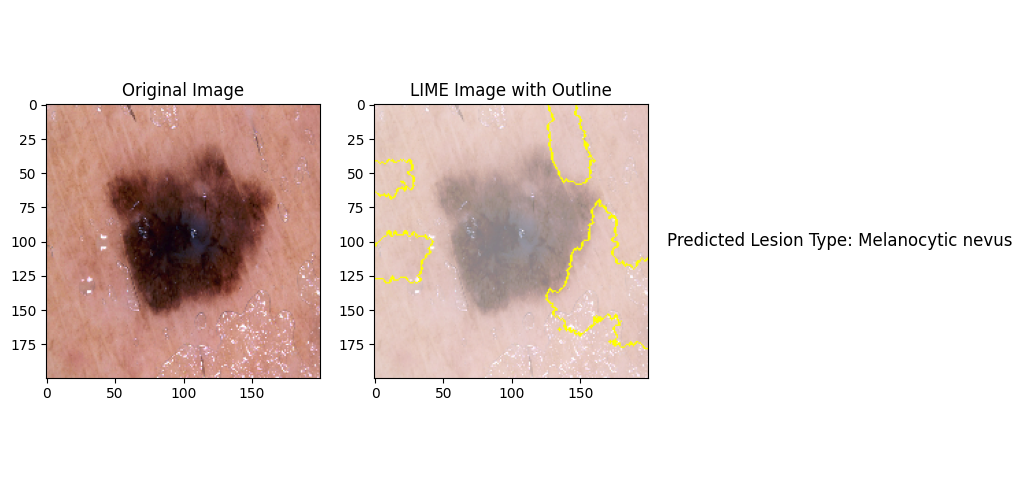

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step
Sample Index: 1
Feature: 11, Weight: 0.06433383274238255
Feature: 17, Weight: 0.056487400404701044
Feature: 22, Weight: 0.053572797283510186
Feature: 6, Weight: 0.04793924971374049
Feature: 2, Weight: 0.042888830294207744
Feature: 26, Weight: 0.03712534148497111
Feature: 12, Weight: 0.036830285142365936
Feature: 18, Weight: 0.03451090389406178
Feature: 10, Weight: 0.03448009927669752
Feature: 5, Weight: 0.03384071792125835
Feature: 16, Weight: 0.03374702832751385
Feature: 25, Weight: 0.03272159111251624
Feature: 24, Weight: 0.03176979041357704
Feature: 4, Weight: 0.03105595172477947
Feature: 8, Weight: 0.030401897399020515
Feature: 15, Weight: 0.03038526829473866
Feature: 7, Weight: 0.028500672805934275
Feature: 0, Weight: 0.02661114206492069
Feature: 3, Weight: 0.026292599056708634
Feature: 14, Weight: 0.02369878078611481
Feature: 13, Weight: 0.02129179326889519
Feature: 20, Weight: 0.01862328246585674
Feature: 1, Weight: 0.013204077

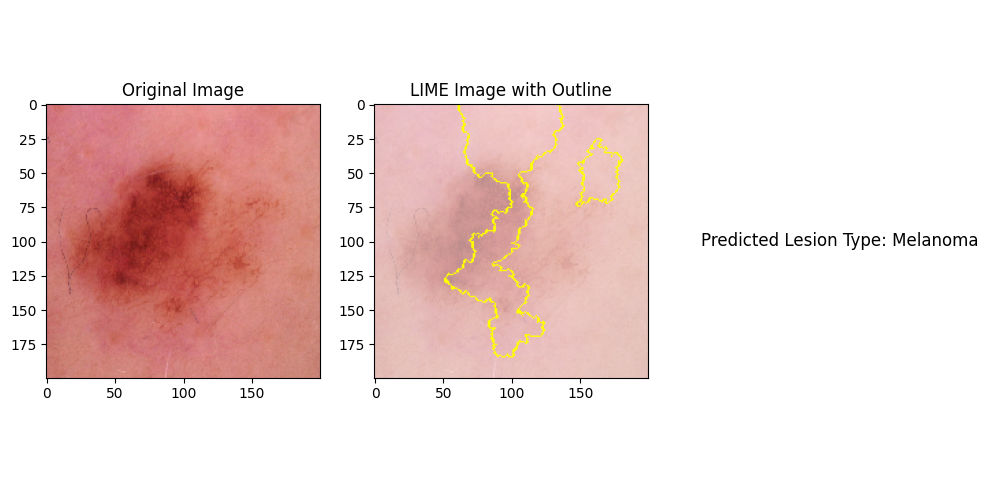

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step
Sample Index: 2
Feature: 23, Weight: 0.08383427936867305
Feature: 12, Weight: 0.0778836222269238
Feature: 16, Weight: 0.06366250805182423
Feature: 5, Weight: 0.060870721787155455
Feature: 6, Weight: 0.05388045698017558
Feature: 19, Weight: 0.05260015149158628
Feature: 2, Weight: 0.04860509913857501
Feature: 13, Weight: 0.04809969992512198
Feature: 10, Weight: 0.04761137761807696
Feature: 4, Weight: 0.04552789560238087
Feature: 22, Weight: 0.0433134559823968
Feature: 18, Weight: 0.039907515606220585
Feature: 1, Weight: 0.03368592681286691
Feature: 0, Weight: 0.030155326580411132
Feature: 14, Weight: 0.026472526370443623
Feature: 24, Weight: 0.025726066167369038
Feature: 20, Weight: -0.02537697749259037
Feature: 7, Weight: 0.025236276344959133
Feature: 11, Weight: -0.024797004440239332
Feature: 21, Weight: 0.022092570898526516
Feature: 17, Weight: 0.021743300101525826
Feature: 3, Weight: 0.01906903540092261
Feature: 15, Weight: -0.01632

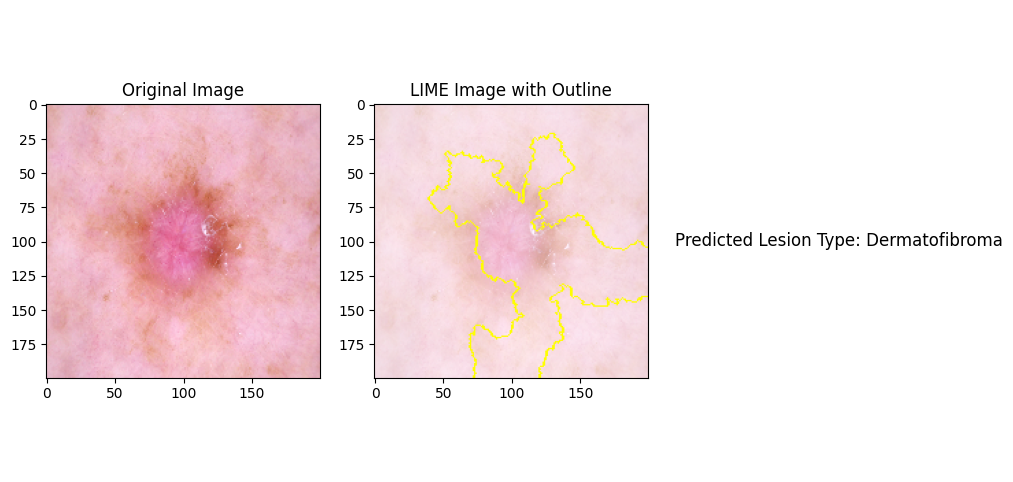

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step
Sample Index: 3
Feature: 3, Weight: 0.06260290753607986
Feature: 13, Weight: 0.049292534849419124
Feature: 15, Weight: 0.048216749438675016
Feature: 12, Weight: 0.04068123113406278
Feature: 2, Weight: 0.03844529909535926
Feature: 10, Weight: 0.03772801370201247
Feature: 22, Weight: 0.03735565620286967
Feature: 20, Weight: 0.03703864523160407
Feature: 11, Weight: 0.035273564366772106
Feature: 0, Weight: 0.03432927901735194
Feature: 25, Weight: 0.03401612176987531
Feature: 14, Weight: 0.032693402389339044
Feature: 17, Weight: 0.03122991751200743
Feature: 4, Weight: 0.027531018304537868
Feature: 6, Weight: 0.025518166722055924
Feature: 28, Weight: 0.023891701279089312
Feature: 9, Weight: 0.022883205405969515
Feature: 5, Weight: 0.022683938143421876
Feature: 24, Weight: 0.02206033452677723
Feature: 1, Weight: 0.02144812945808677
Feature: 26, Weight: 0.01887552426026287
Feature: 23, Weight: 0.01878316007928021
Feature: 7, Weight: 0.0070779

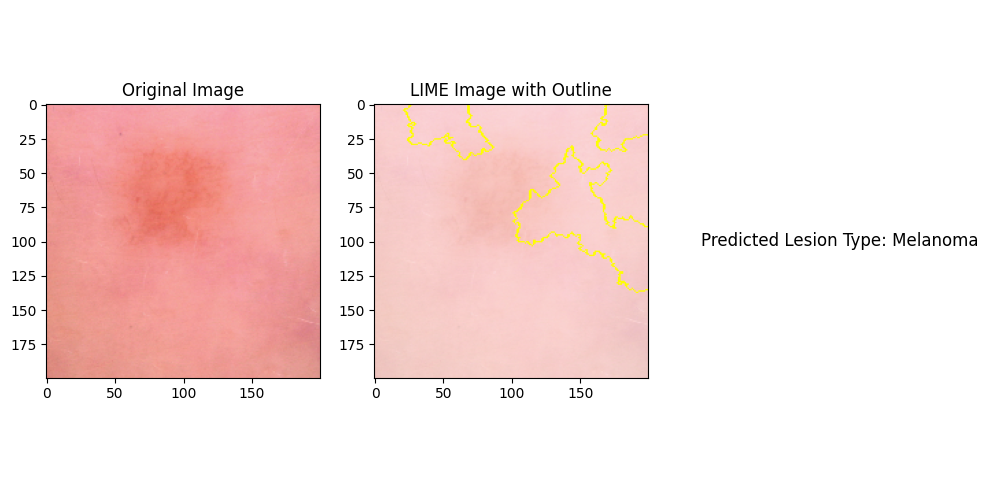

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step
Sample Index: 4
Feature: 32, Weight: 0.04943057711072571
Feature: 21, Weight: 0.04177041561871807
Feature: 25, Weight: 0.03499019696160385
Feature: 13, Weight: 0.03445368567651664
Feature: 15, Weight: 0.029086883203895367
Feature: 4, Weight: 0.02890011327066864
Feature: 5, Weight: 0.027451542140133695
Feature: 3, Weight: 0.027443155823785762
Feature: 29, Weight: 0.026484459350057745
Feature: 30, Weight: 0.026454487387506453
Feature: 12, Weight: 0.026059692092236745
Feature: 26, Weight: 0.023497958527529176
Feature: 33, Weight: 0.021159224738025003
Feature: 31, Weight: 0.02096669012478155
Feature: 9, Weight: 0.017852690888479295
Feature: 7, Weight: 0.016421970777184002
Feature: 19, Weight: 0.01606993839189633
Feature: 24, Weight: 0.015942197784549632
Feature: 27, Weight: 0.015422360773605988
Feature: 6, Weight: 0.014209959742585224
Feature: 1, Weight: 0.0131578011058535
Feature: 0, Weight: 0.012839768028634752
Feature: 22, Weight: 0.01

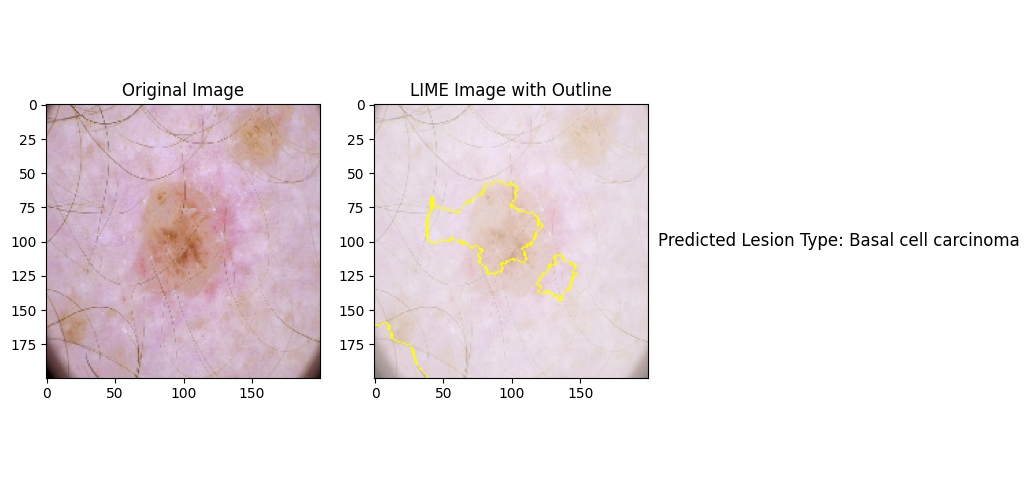

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step
Sample Index: 5
Feature: 37, Weight: 0.06752354061920583
Feature: 25, Weight: 0.05236005387630143
Feature: 2, Weight: 0.05059773065887985
Feature: 19, Weight: 0.04873488252358725
Feature: 8, Weight: 0.04731818058110228
Feature: 13, Weight: 0.04577557106572075
Feature: 29, Weight: 0.03789427819867867
Feature: 38, Weight: 0.03728674533189759
Feature: 20, Weight: 0.0363676409110888
Feature: 6, Weight: 0.035721920562438655
Feature: 32, Weight: 0.032997578934975305
Feature: 17, Weight: 0.03063104446153789
Feature: 35, Weight: 0.02988908589050594
Feature: 21, Weight: 0.028708193504343508
Feature: 23, Weight: 0.027994072424251296
Feature: 36, Weight: 0.027912140989489145
Feature: 0, Weight: 0.026628515186995858
Feature: 9, Weight: 0.02597130576499506
Feature: 4, Weight: 0.0247589213419641
Feature: 27, Weight: 0.023973921528545418
Feature: 3, Weight: 0.022780636190424093
Feature: 7, Weight: 0.02252840374840548
Feature: 5, Weight: 0.0214006130

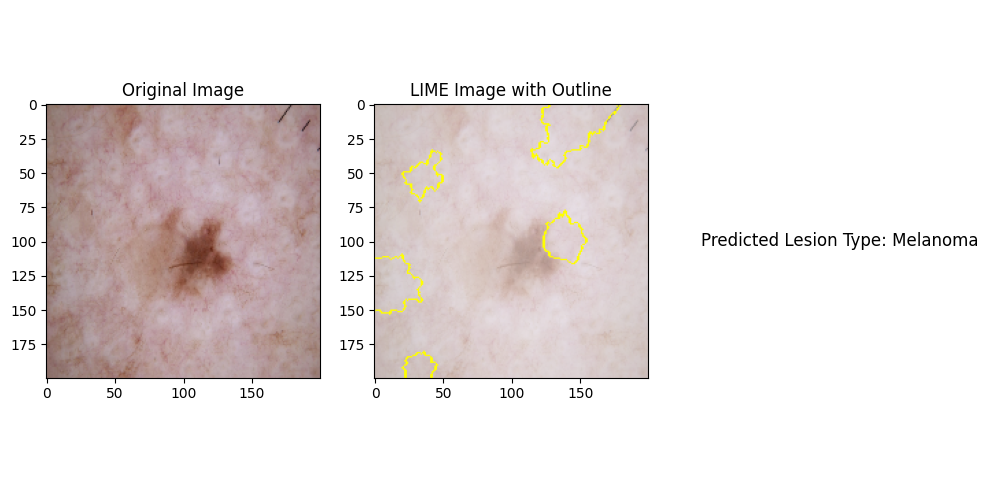

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step
Sample Index: 6
Feature: 13, Weight: 0.09492894288832289
Feature: 0, Weight: 0.0925860198632956
Feature: 12, Weight: 0.08679028350831494
Feature: 3, Weight: 0.08099654981981191
Feature: 25, Weight: 0.07573478141821992
Feature: 2, Weight: 0.06542804913620187
Feature: 23, Weight: 0.06056873704223504
Feature: 14, Weight: 0.059582249857360575
Feature: 22, Weight: 0.055560920683870536
Feature: 20, Weight: 0.05317353931104269
Feature: 5, Weight: 0.0504462947095509
Feature: 1, Weight: 0.04895944488808372
Feature: 8, Weight: 0.04827265819811738
Feature: 4, Weight: 0.04520079168059405
Feature: 10, Weight: 0.0401498980326909
Feature: 15, Weight: -0.032345813696330716
Feature: 26, Weight: -0.03128679417873185
Feature: 27, Weight: -0.02563290855335123
Feature: 24, Weight: 0.023342327909066155
Feature: 17, Weight: 0.023283753513899497
Feature: 16, Weight: -0.02194005931884825
Feature: 9, Weight: 0.01350930153022091
Feature: 18, Weight: 0.011803478

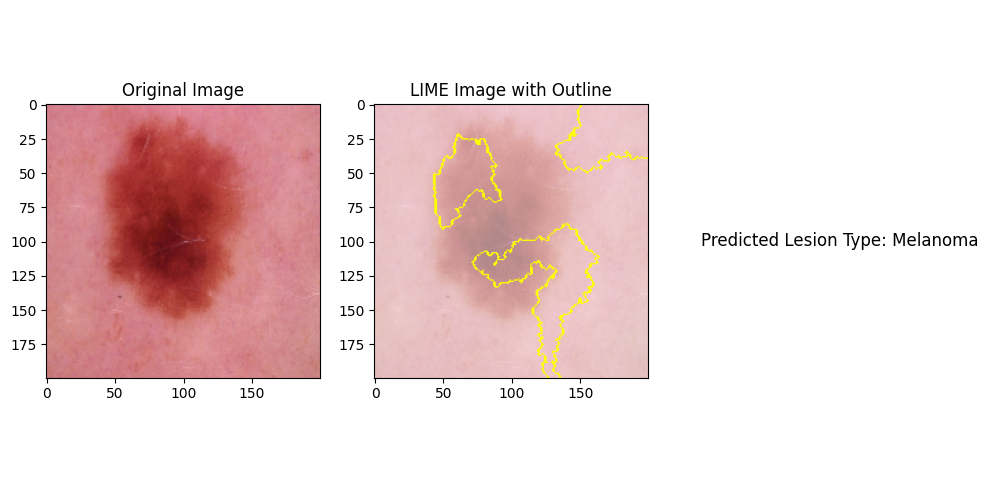

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step
Sample Index: 7
Feature: 8, Weight: 0.05381101306472219
Feature: 2, Weight: 0.04836223782065622
Feature: 18, Weight: 0.045965977368824525
Feature: 13, Weight: 0.04175726721529213
Feature: 25, Weight: 0.040853901196109474
Feature: 17, Weight: 0.03815099924251604
Feature: 19, Weight: 0.03785833593669056
Feature: 10, Weight: 0.032106457328844616
Feature: 9, Weight: 0.031122296696730233
Feature: 6, Weight: 0.0309691775578399
Feature: 4, Weight: 0.030390152609895537
Feature: 5, Weight: 0.030297681291063423
Feature: 28, Weight: 0.028791163051977795
Feature: 0, Weight: 0.027286139905613353
Feature: 20, Weight: 0.02671372550074125
Feature: 27, Weight: 0.026082620833458664
Feature: 12, Weight: 0.025997667360138296
Feature: 14, Weight: 0.024633378955936206
Feature: 22, Weight: 0.02364808383646582
Feature: 26, Weight: 0.022691097302836145
Feature: 29, Weight: 0.019728945092315067
Feature: 15, Weight: 0.01605134805991935
Feature: 16, Weight: 0.01

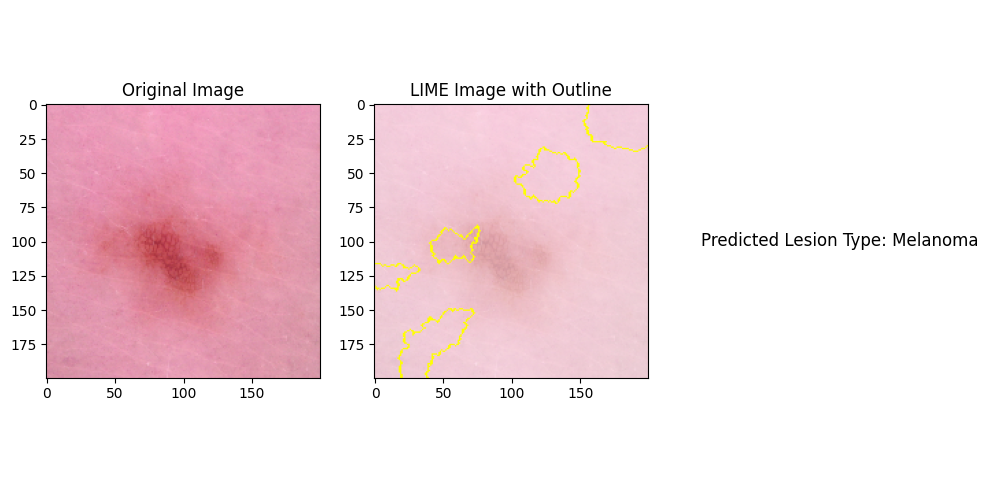

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step
Sample Index: 8
Feature: 26, Weight: 0.0650613772561433
Feature: 22, Weight: 0.06494499625772963
Feature: 0, Weight: 0.06258392134709193
Feature: 20, Weight: 0.05695924503156001
Feature: 2, Weight: 0.054933293730365665
Feature: 4, Weight: 0.052345449807532744
Feature: 11, Weight: 0.04601887958060513
Feature: 27, Weight: 0.04584522184722837
Feature: 8, Weight: 0.041566118442577814
Feature: 7, Weight: 0.04148404456919838
Feature: 19, Weight: 0.036508544265198284
Feature: 18, Weight: 0.036221079853850986
Feature: 9, Weight: 0.03431245501319775
Feature: 23, Weight: 0.033403207643441214
Feature: 6, Weight: 0.02880661500890538
Feature: 14, Weight: 0.026842344035749977
Feature: 15, Weight: 0.025486290463806682
Feature: 25, Weight: 0.022661927482653405
Feature: 21, Weight: 0.022274814539051162
Feature: 28, Weight: 0.018281934906332026
Feature: 3, Weight: 0.018219670778463332
Feature: 17, Weight: 0.017044953001217104
Feature: 10, Weight: 0.017

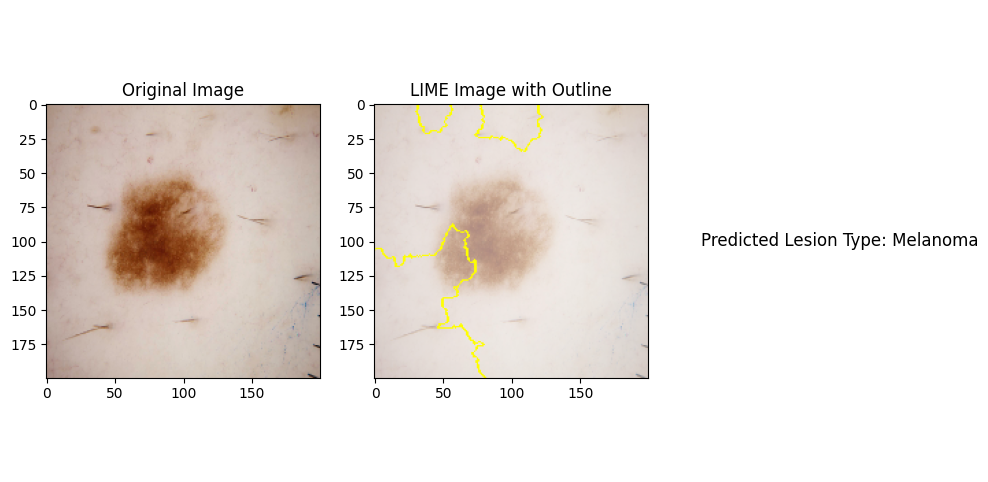

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step
Sample Index: 9
Feature: 19, Weight: 0.05061142515378209
Feature: 18, Weight: 0.04992560105113188
Feature: 23, Weight: 0.043585855322847276
Feature: 0, Weight: 0.043034226235897734
Feature: 4, Weight: 0.038588058861739424
Feature: 30, Weight: 0.03778207853822117
Feature: 16, Weight: 0.03732968116260276
Feature: 8, Weight: 0.03528484495641648
Feature: 26, Weight: 0.03456423687051537
Feature: 32, Weight: 0.03430978804757304
Feature: 20, Weight: 0.03279220294841908
Feature: 13, Weight: 0.031683888307563274
Feature: 7, Weight: 0.030424572555017664
Feature: 12, Weight: 0.026778599567088602
Feature: 6, Weight: 0.025158861344653578
Feature: 3, Weight: 0.024602072900672362
Feature: 35, Weight: 0.02389066177860838
Feature: 15, Weight: 0.02380118413798679
Feature: 27, Weight: 0.023609932923264555
Feature: 5, Weight: 0.02169735119984591
Feature: 33, Weight: 0.02087326610937169
Feature: 24, Weight: 0.019826981252732353
Feature: 28, Weight: 0.0188

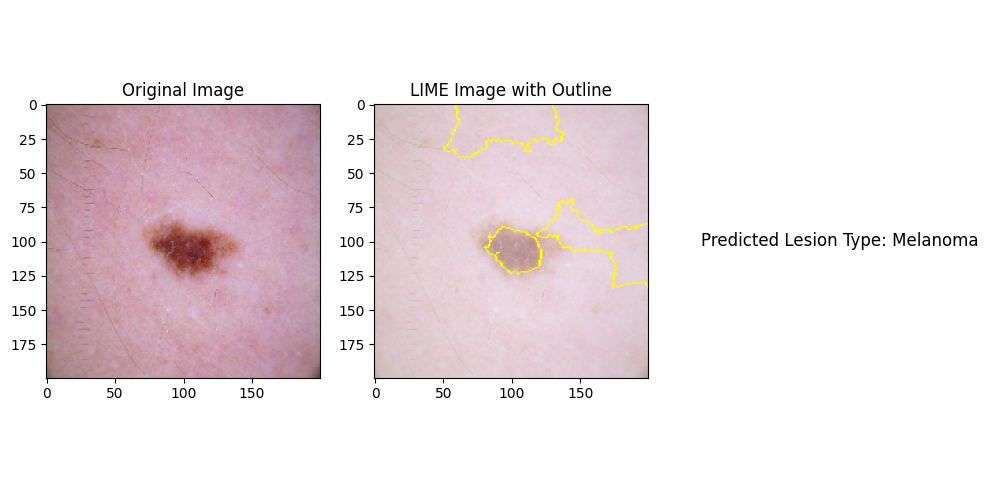

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step
Sample Index: 10
Feature: 8, Weight: 0.1805682295911064
Feature: 22, Weight: 0.1320612828499442
Feature: 15, Weight: 0.12819783130012222
Feature: 17, Weight: -0.11430633036996947
Feature: 10, Weight: -0.09967112457889797
Feature: 21, Weight: 0.08636425941226761
Feature: 2, Weight: 0.07694930295101676
Feature: 20, Weight: 0.07511087161553205
Feature: 4, Weight: -0.07110205282703061
Feature: 0, Weight: 0.0696329891862399
Feature: 19, Weight: 0.06864547254559014
Feature: 5, Weight: 0.06457270385844754
Feature: 7, Weight: 0.06274074178803064
Feature: 23, Weight: 0.06034821700008927
Feature: 26, Weight: 0.056954256203267904
Feature: 9, Weight: -0.055035727299811425
Feature: 13, Weight: 0.05324622318287851
Feature: 12, Weight: 0.05046527962079654
Feature: 16, Weight: 0.047378288851503476
Feature: 3, Weight: 0.038530256414750746
Feature: 1, Weight: -0.03831869094674906
Feature: 18, Weight: 0.03537487748793058
Feature: 27, Weight: -0.02578976

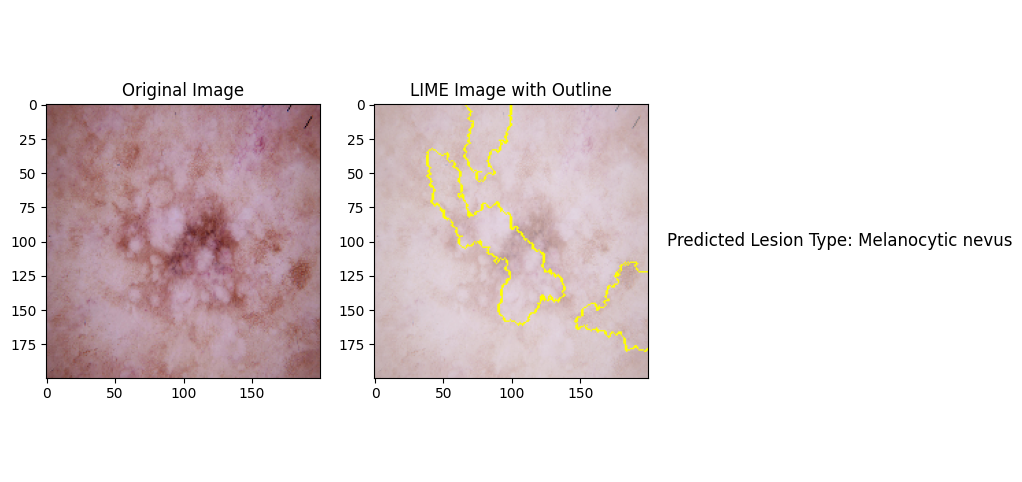

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step
Sample Index: 11
Feature: 23, Weight: 0.05093149102096447
Feature: 21, Weight: 0.05089259411384793
Feature: 7, Weight: 0.04796156058341028
Feature: 14, Weight: 0.043621424899606014
Feature: 3, Weight: 0.04269104235816995
Feature: 16, Weight: 0.04255889061325049
Feature: 19, Weight: 0.03942714426782186
Feature: 2, Weight: 0.034072082154812916
Feature: 25, Weight: 0.03382692731576293
Feature: 9, Weight: 0.03364189232361932
Feature: 6, Weight: 0.030448912599409225
Feature: 0, Weight: 0.03000863023524735
Feature: 27, Weight: 0.029113933915163974
Feature: 11, Weight: 0.028221546745309682
Feature: 17, Weight: 0.024906624856318334
Feature: 8, Weight: 0.02444376093204203
Feature: 13, Weight: 0.02433406753426833
Feature: 5, Weight: 0.02217542067247219
Feature: 12, Weight: 0.021808705414616575
Feature: 15, Weight: 0.018494946014540315
Feature: 24, Weight: 0.01399284190383969
Feature: 4, Weight: 0.012248104675556723
Feature: 18, Weight: 0.007929

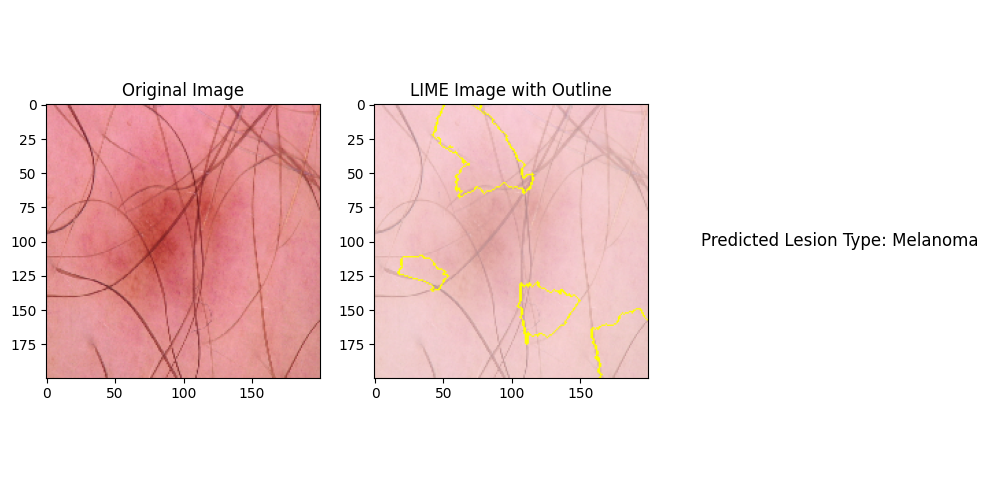

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step
Sample Index: 12
Feature: 10, Weight: 0.07881579782308064
Feature: 5, Weight: 0.0704022289359657
Feature: 32, Weight: 0.06297821171549531
Feature: 12, Weight: 0.05851143361339314
Feature: 30, Weight: 0.05523526262652954
Feature: 29, Weight: 0.05449945351063993
Feature: 1, Weight: 0.05419314129060305
Feature: 33, Weight: 0.05177477921985381
Feature: 31, Weight: 0.05045753851298178
Feature: 13, Weight: 0.0468963347103812
Feature: 7, Weight: 0.04258741229944304
Feature: 22, Weight: 0.042557263085499
Feature: 28, Weight: 0.040011614042581266
Feature: 20, Weight: 0.03678263139233342
Feature: 15, Weight: 0.03580441749705862
Feature: 23, Weight: 0.03477937252959286
Feature: 24, Weight: 0.03305412474085308
Feature: 11, Weight: 0.030674107122346275
Feature: 26, Weight: 0.02911394442136043
Feature: 14, Weight: 0.027760424819353615
Feature: 4, Weight: 0.02683544686474656
Feature: 0, Weight: 0.024757137588943406
Feature: 6, Weight: 0.023584569388

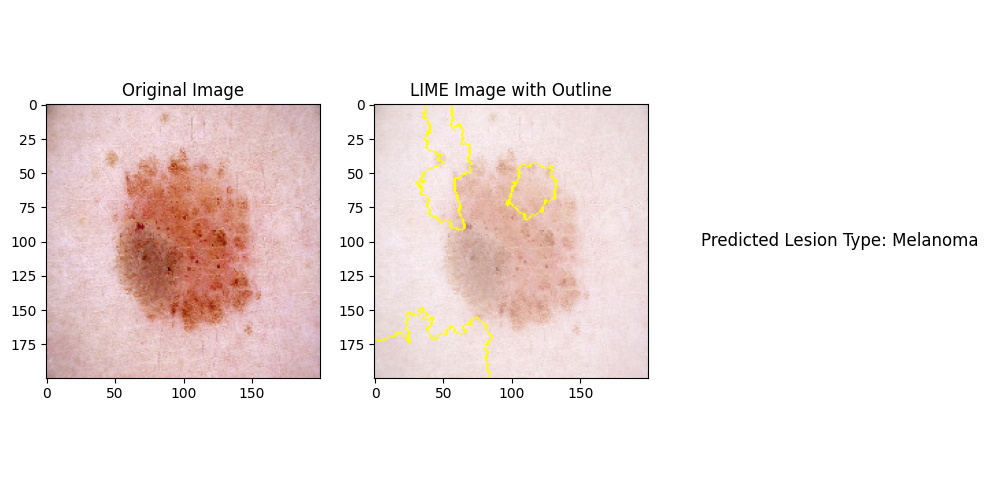

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step
Sample Index: 13
Feature: 11, Weight: 0.05649180433722621
Feature: 4, Weight: 0.044193694062110316
Feature: 12, Weight: 0.04311925396911543
Feature: 2, Weight: 0.041547569745892174
Feature: 6, Weight: 0.04144894354165668
Feature: 10, Weight: 0.038716366329704176
Feature: 26, Weight: 0.03805968079805337
Feature: 37, Weight: 0.036987921442642985
Feature: 15, Weight: 0.03693229615695354
Feature: 14, Weight: 0.032940200713198996
Feature: 21, Weight: 0.03274770344767133
Feature: 13, Weight: 0.03221503708919252
Feature: 28, Weight: 0.030939938192085188
Feature: 35, Weight: 0.03079158533677664
Feature: 25, Weight: 0.03003131651192877
Feature: 23, Weight: 0.02773899780333201
Feature: 9, Weight: 0.02589288567178412
Feature: 3, Weight: 0.025758314737018017
Feature: 36, Weight: 0.02561339051304348
Feature: 32, Weight: 0.025078376750361165
Feature: 33, Weight: 0.024590327190249943
Feature: 29, Weight: 0.024314593032442662
Feature: 31, Weight: 0.0

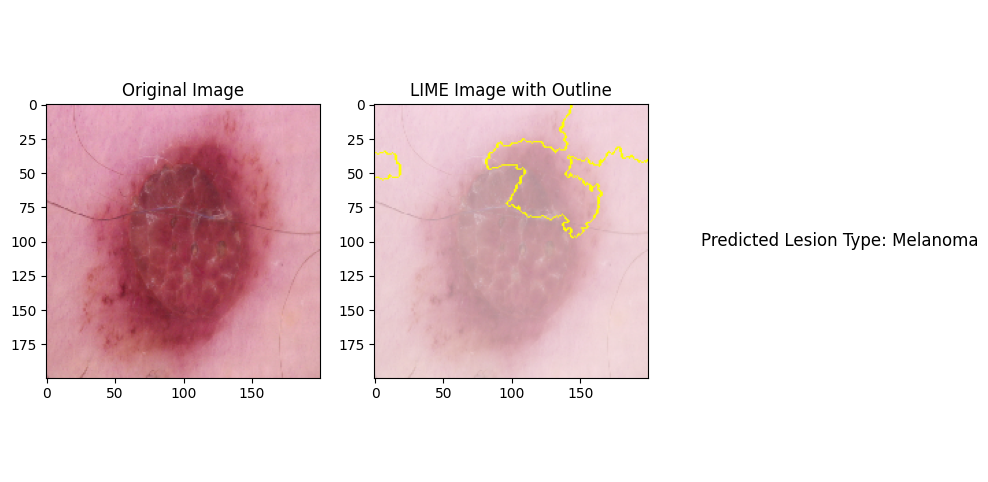

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step
Sample Index: 14
Feature: 15, Weight: 0.0698910574640526
Feature: 21, Weight: 0.06285514464308414
Feature: 10, Weight: 0.05814583043495132
Feature: 11, Weight: 0.0548615308566693
Feature: 17, Weight: 0.044610613048673586
Feature: 4, Weight: 0.04282075336244489
Feature: 30, Weight: 0.04101571281385141
Feature: 0, Weight: 0.04029991533165771
Feature: 32, Weight: 0.0398244406938175
Feature: 24, Weight: 0.03834970411041223
Feature: 20, Weight: 0.03833623735091284
Feature: 23, Weight: 0.036505836923894454
Feature: 13, Weight: 0.03474023779274736
Feature: 8, Weight: 0.0337478052664356
Feature: 12, Weight: 0.03334846985702225
Feature: 22, Weight: 0.027994656833175657
Feature: 28, Weight: 0.0274560210992786
Feature: 18, Weight: 0.02742765796644895
Feature: 3, Weight: 0.0273462054689291
Feature: 9, Weight: 0.02595870886998917
Feature: 25, Weight: 0.025813582181514864
Feature: 29, Weight: 0.02415336490423074
Feature: 16, Weight: 0.0190652030729

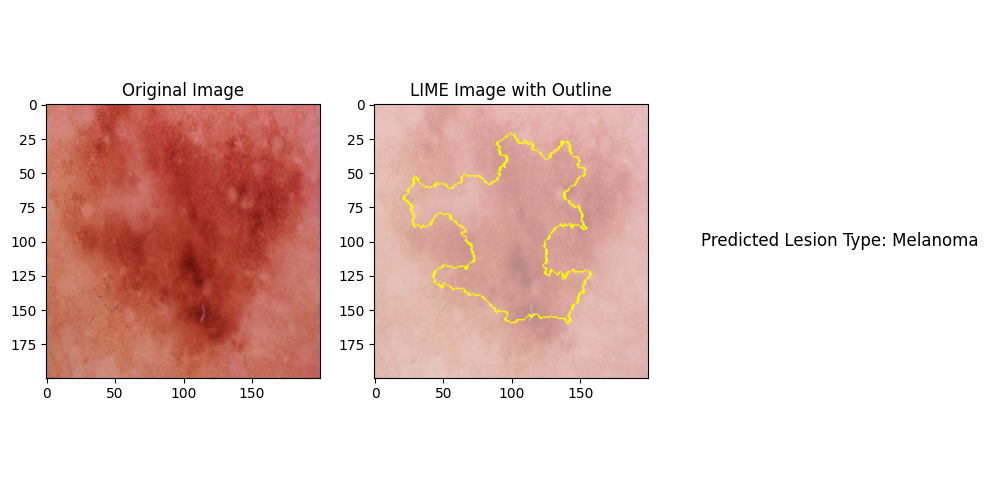

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step
Sample Index: 15
Feature: 17, Weight: 0.06483352509651628
Feature: 22, Weight: 0.057330092627559455
Feature: 36, Weight: 0.0556909294035093
Feature: 2, Weight: 0.05487806434240227
Feature: 25, Weight: 0.05484520860559668
Feature: 5, Weight: 0.053065015000124345
Feature: 34, Weight: 0.05228336481608178
Feature: 31, Weight: 0.051925954428076695
Feature: 35, Weight: 0.04845496765920636
Feature: 21, Weight: 0.04832373026089526
Feature: 18, Weight: 0.04206985418609254
Feature: 28, Weight: 0.04198952688635594
Feature: 11, Weight: 0.038815258201260645
Feature: 23, Weight: 0.03288911749484656
Feature: 20, Weight: 0.029301964141956575
Feature: 27, Weight: 0.029109999612301155
Feature: 9, Weight: 0.028803731686943283
Feature: 30, Weight: 0.028336461447689112
Feature: 15, Weight: 0.028329705674209213
Feature: 14, Weight: 0.0270685435009609
Feature: 19, Weight: 0.022336693563652102
Feature: 10, Weight: 0.021340855472442483
Feature: 16, Weight: 0.

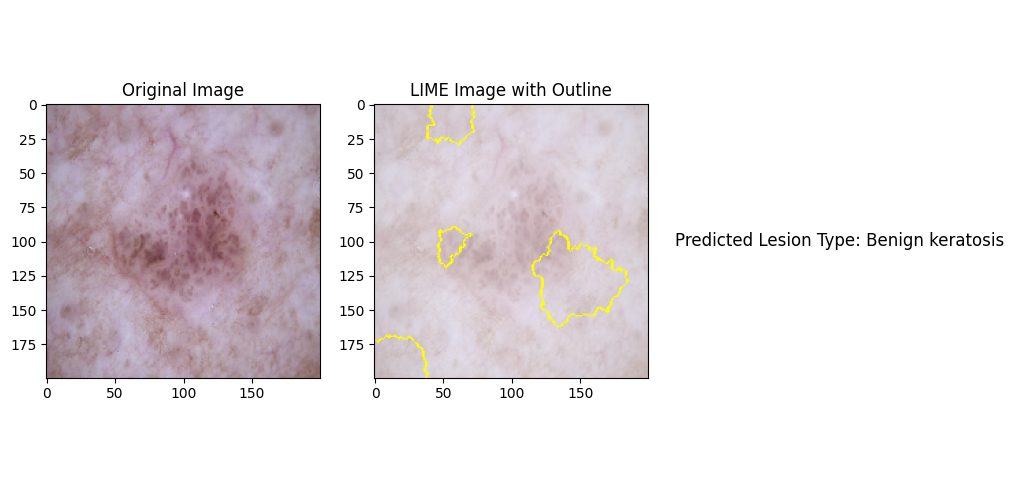

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step
Sample Index: 16
Feature: 15, Weight: 0.07605129662879326
Feature: 21, Weight: 0.05986511450253409
Feature: 8, Weight: 0.05441401429196629
Feature: 28, Weight: 0.05307815750605195
Feature: 17, Weight: 0.051831145610646695
Feature: 29, Weight: 0.049850892840687826
Feature: 12, Weight: 0.048620845746438345
Feature: 2, Weight: 0.04646331961650909
Feature: 22, Weight: -0.04269639422598271
Feature: 19, Weight: 0.04009437923001242
Feature: 16, Weight: 0.035317991381857816
Feature: 27, Weight: 0.034789386974417705
Feature: 1, Weight: 0.03447675363277565
Feature: 14, Weight: 0.03325186989233291
Feature: 6, Weight: 0.031797727201799304
Feature: 5, Weight: 0.031725493459367746
Feature: 20, Weight: 0.03170830859626228
Feature: 3, Weight: 0.030363106629223178
Feature: 10, Weight: 0.023936007605109576
Feature: 24, Weight: -0.022180037897926413
Feature: 30, Weight: 0.022063109821774198
Feature: 26, Weight: 0.01952211661803891
Feature: 13, Weight: 0

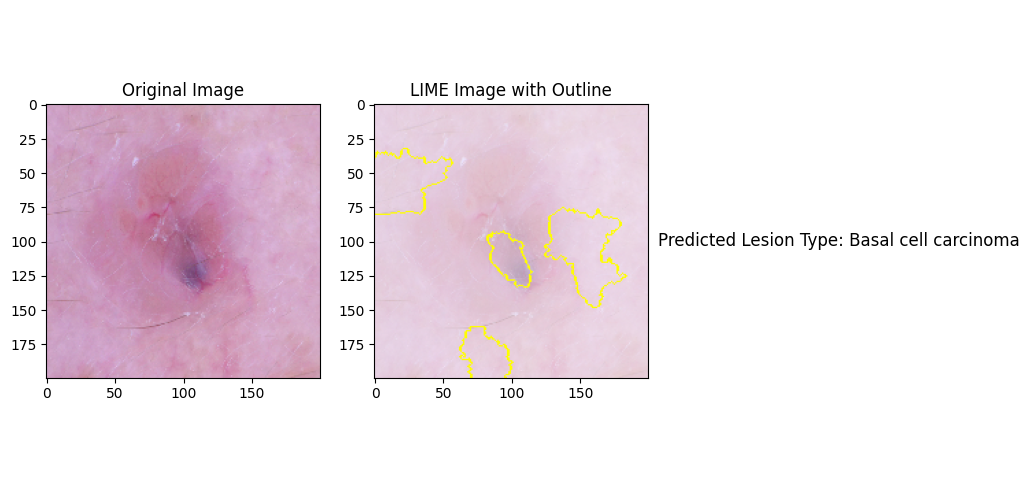

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step
Sample Index: 17
Feature: 17, Weight: 0.07311997406839472
Feature: 28, Weight: 0.07093389626268713
Feature: 12, Weight: 0.06845041326250424
Feature: 13, Weight: 0.06184281400732113
Feature: 3, Weight: 0.056152616708103245
Feature: 8, Weight: 0.05587285743459313
Feature: 22, Weight: 0.055271845531174084
Feature: 26, Weight: 0.05218908026971522
Feature: 25, Weight: 0.051722387098668485
Feature: 6, Weight: 0.049735816253003585
Feature: 4, Weight: 0.04751893015349471
Feature: 14, Weight: 0.046676797417065326
Feature: 9, Weight: 0.04500151269750418
Feature: 1, Weight: 0.04440569356875829
Feature: 2, Weight: 0.042842072159902746
Feature: 19, Weight: 0.036178101732758004
Feature: 11, Weight: 0.03126055585910852
Feature: 0, Weight: 0.029896129465754057
Feature: 23, Weight: 0.027989478752140112
Feature: 21, Weight: 0.026548127006712396
Feature: 10, Weight: 0.023270085904176008
Feature: 18, Weight: 0.0229222098787251
Feature: 27, Weight: 0.0184

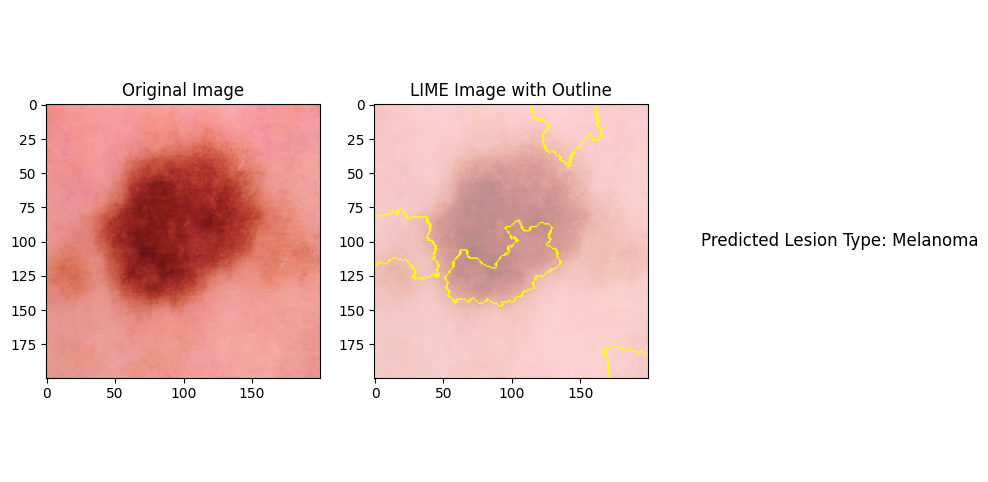

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step
Sample Index: 18
Feature: 37, Weight: 0.05055037262623633
Feature: 3, Weight: 0.04897705265650416
Feature: 14, Weight: 0.047127910232403564
Feature: 7, Weight: 0.04422424455168885
Feature: 9, Weight: 0.03869912843520845
Feature: 25, Weight: 0.036550265872166254
Feature: 30, Weight: 0.034144692598667314
Feature: 33, Weight: 0.03300943920553681
Feature: 27, Weight: 0.03263535752939706
Feature: 0, Weight: 0.031648058065900826
Feature: 16, Weight: 0.031034017470818534
Feature: 4, Weight: 0.028691038875895823
Feature: 17, Weight: 0.02851454688130239
Feature: 12, Weight: 0.028143522842232822
Feature: 34, Weight: 0.026284359893094453
Feature: 10, Weight: 0.025951817214140038
Feature: 24, Weight: 0.022580027651548585
Feature: 11, Weight: 0.022168433746977786
Feature: 19, Weight: 0.01975182054189813
Feature: 38, Weight: 0.019700746725695474
Feature: 36, Weight: 0.019296839718526537
Feature: 8, Weight: 0.017276691984743894
Feature: 22, Weight: 

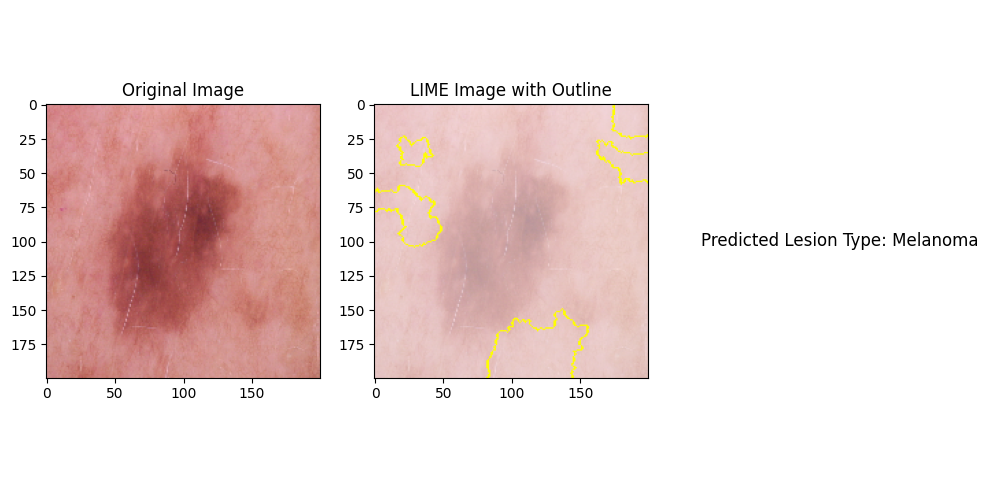

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step
Sample Index: 19
Feature: 24, Weight: 0.0837117387808913
Feature: 18, Weight: 0.0776464973148329
Feature: 26, Weight: 0.06833987098780711
Feature: 12, Weight: 0.0632177904312857
Feature: 1, Weight: 0.05492022348214545
Feature: 17, Weight: 0.05219739967071165
Feature: 23, Weight: 0.05016905409036096
Feature: 0, Weight: 0.04947135994128232
Feature: 7, Weight: 0.04542598836308912
Feature: 8, Weight: 0.04477283588699553
Feature: 19, Weight: 0.04442485831313518
Feature: 16, Weight: 0.04192135150854077
Feature: 2, Weight: 0.04064716082932972
Feature: 22, Weight: 0.03321603246659269
Feature: 14, Weight: 0.03169032460294781
Feature: 27, Weight: 0.027372379654445132
Feature: 15, Weight: 0.026397808486155853
Feature: 6, Weight: 0.02629277188902317
Feature: 3, Weight: 0.022454714476674034
Feature: 5, Weight: 0.021282441689952053
Feature: 11, Weight: -0.020823776153328477
Feature: 29, Weight: 0.020818043767226704
Feature: 28, Weight: 0.0138749933

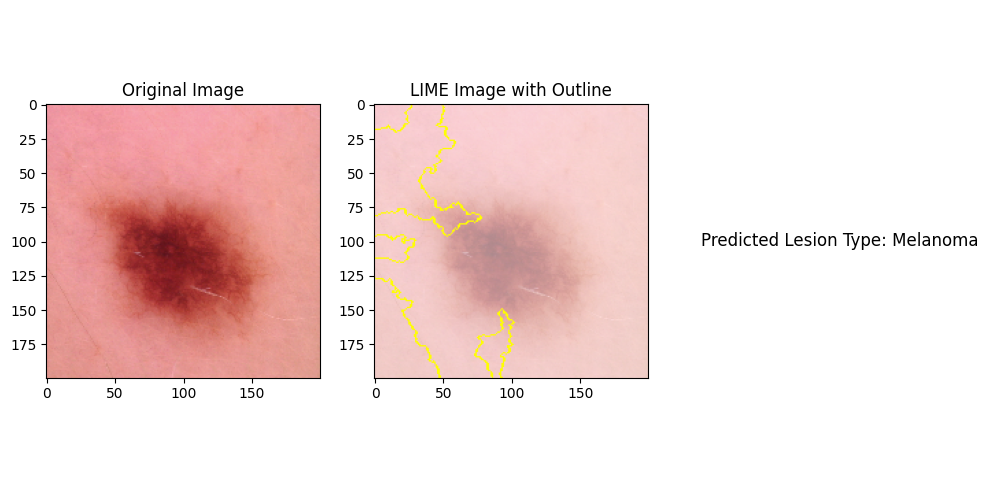

In [8]:
# Visualize original image, LIME explanation, predict skin lesion type, and display image name
def visualize_images(sample_index):
    original_img = data[sample_index]
    xai_explanation = generate_lime_explanation(sample_index)
    text_xai_explanation = generate_text_lime_explanation(xai_explanation)
    print(f"Sample Index: {sample_index}")
    for explanation in text_xai_explanation:
        print(explanation)
    print("\n")
    
    # Predict skin lesion type using the model
    prediction = model.predict(np.expand_dims(original_img, axis=0))
    predicted_class = np.argmax(prediction)
    
    lesion_types = [
    'Actinic keratosis',
    'Basal cell carcinoma',
    'Benign keratosis',
    'Dermatofibroma',
    'Melanocytic nevus',
    'Melanoma',
    'Vascular lesion'
]
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    
    # LIME Image with outline
    temp, mask = xai_explanation.get_image_and_mask(xai_explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.subplot(1, 3, 2)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title("LIME Image with Outline")
    
    # Predicted Skin Lesion Type
    if predicted_class < len(lesion_types):
        predicted_label = lesion_types[predicted_class]
    else:
        predicted_label = "No skin lesion found"
    
    plt.subplot(1, 3, 3)
    plt.text(0.5, 0.5, f"Predicted Lesion Type: {predicted_label}", ha='center', va='center', fontsize=12)
    plt.axis('off')
    plt.show()

# Iterate over all sample indices and visualize images
for sample_index in range(len(data)):
    visualize_images(sample_index)